In [ ]:
!pip install scikit-learn matplotlib numpy pandas seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


Accuracy: 0.7140096618357488

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       739
           1       0.00      0.00      0.00       296

    accuracy                           0.71      1035
   macro avg       0.36      0.50      0.42      1035
weighted avg       0.51      0.71      0.59      1035



c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

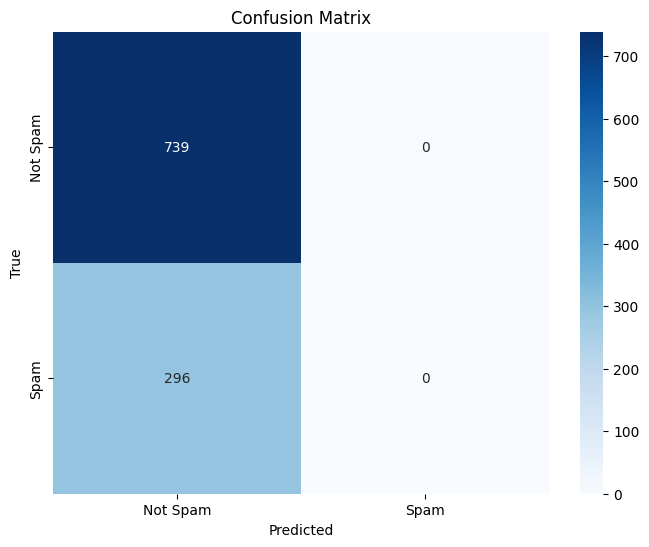

In [73]:

# For dataset emails_words.csv
df1 = pd.read_csv('Dataset/emails_words.csv')
df1.sample(10)
x1 = df1.drop('Prediction', axis=1).astype(str).agg(' '.join, axis=1)
y1 = df1['Prediction']

tf1 = TfidfVectorizer(stop_words='english')
x_tfidf1 = tf1.fit_transform(x1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tfidf1, y1, test_size=0.2, random_state=42)

model1 = MultinomialNB()
model1.fit(x_train1, y_train1)
y_pred1 = model1.predict(x_test1)

print('Accuracy:', accuracy_score(y_test1, y_pred1))
print('\nClassification Report:\n', classification_report(y_test1, y_pred1))

cm1 = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.8979057591623036

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       856
           1       1.00      0.60      0.75       290

    accuracy                           0.90      1146
   macro avg       0.94      0.80      0.84      1146
weighted avg       0.91      0.90      0.89      1146



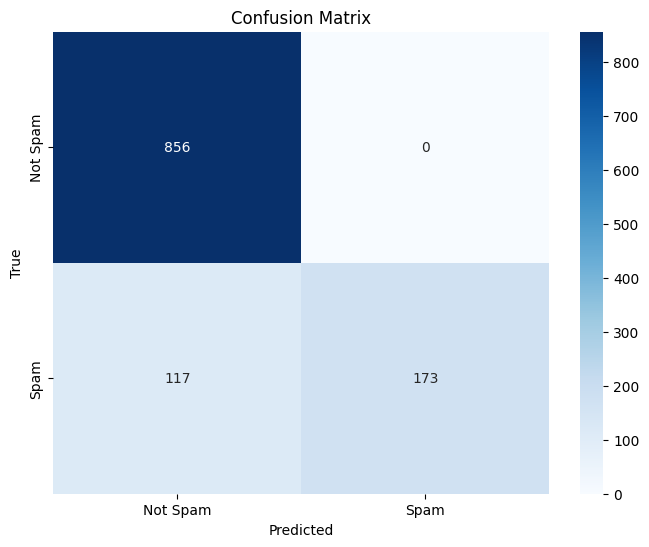

In [74]:
# For dataset emails.csv
df = pd.read_csv('Dataset/emails.csv')

df = df.dropna(subset=['spam'])

df = df.dropna(subset=['text'])

x = df['text']
y = df['spam']

vectorizer = TfidfVectorizer(stop_words='english')
x_tfidf = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
